In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as py
%matplotlib inline

In [0]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (10, 6)

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
crops = ['Coconut', 'Groundnut', 'Maize', 'Onion', 'Paddy', 'Potato', 'Ragi', 'Rice', 'Tomato',
         'Wheat']

In [0]:
print("Choose a crop")
i = 1
for crop in crops:
    print("%d => %s" %(i,crop))
    i = i+1

idx = 0
while(idx == 0):
    try:
        idx = int(input("Enter the crop number : "))
    except:
        idx = 0
        print('Enter a number')
print("You have selected : ", crops[idx-1])

Choose a crop
1 => Coconut
2 => Groundnut
3 => Maize
4 => Onion
5 => Paddy
6 => Potato
7 => Ragi
8 => Rice
9 => Tomato
10 => Wheat
Enter the crop number : 2
You have selected :  Groundnut


In [0]:
fName = "/WeekDataPy/"+crops[idx-1]+".csv"
data = pd.read_csv(fName, parse_dates = ['Date'], index_col = ['Date'])

In [0]:
data.head()

,Bagalakot,Bangalore,Bellary,Chitradurga,Davangere,Gadag,Hubli (Amaragol),Koppal,Laxmeshwar,Mundaragi,Mysore (Bandipalya),Raichur,Rona,Savanur,Yadgir
Date,,,,,,,,,,,,,,,
2010-01-04,2286,2450,2742,2794,1828,2947,2589,2465,2270,2357,2100,2210,2197,2473,709
2010-01-11,1938,2450,2458,2973,2350,2872,2546,2318,2281,2366,2093,2201,2113,2504,1764
2010-01-18,1951,2450,2639,2765,2386,2895,2492,2350,2204,2306,2086,2319,2228,2396,2457
2010-01-25,1834,2533,2455,2600,2421,2738,2337,2660,2221,2300,2078,2350,2188,2333,2598
2010-02-01,1846,2550,2539,2773,2478,2615,2209,2769,2277,2330,2071,2510,2152,2217,2528


In [0]:
markets = list(data.columns)

In [0]:
#print(markets)

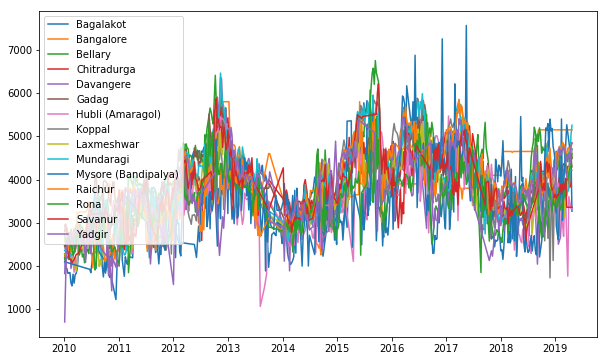

In [0]:
py.plot(data, label = 'Data')
py.legend(markets)
py.show()

In [0]:
print('Select a market :')
i = 1
for market in markets:
    print("%d => %s" %(i, market))
    i = i+1
    
idx = 0
while(idx == 0):
    try:
        idx = int(input("Enter the Market number : "))
    except:
        idx = 0
        print("Enter a number")
        
print("You have selected : ", markets[idx-1])

Select a market :
1 => Bagalakot
2 => Bangalore
3 => Bellary
4 => Chitradurga
5 => Davangere
6 => Gadag
7 => Hubli (Amaragol)
8 => Koppal
9 => Laxmeshwar
10 => Mundaragi
11 => Mysore (Bandipalya)
12 => Raichur
13 => Rona
14 => Savanur
15 => Yadgir
Enter the Market number : 3
You have selected :  Bellary


In [0]:
market = markets[idx-1]
selData = data[[market]]
selData.rename(columns = {market :'Price'}, inplace = True)
selData.head()

,Price
Date,
2010-01-04,2742
2010-01-11,2458
2010-01-18,2639
2010-01-25,2455
2010-02-01,2539


In [0]:
selData.shape

(486, 1)

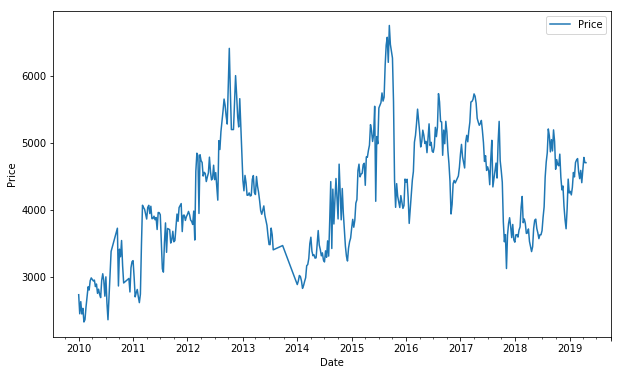

In [0]:
selData.plot()
py.ylabel('Price')
py.show()

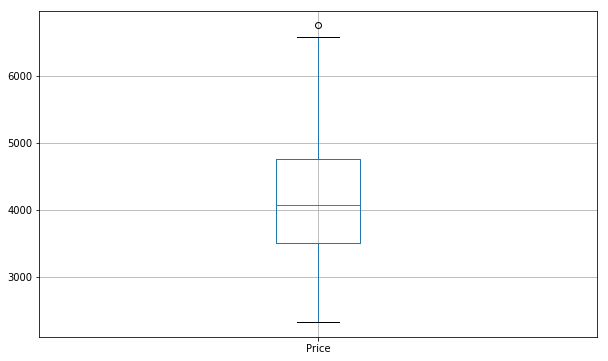

In [0]:
selData.boxplot()
py.show()

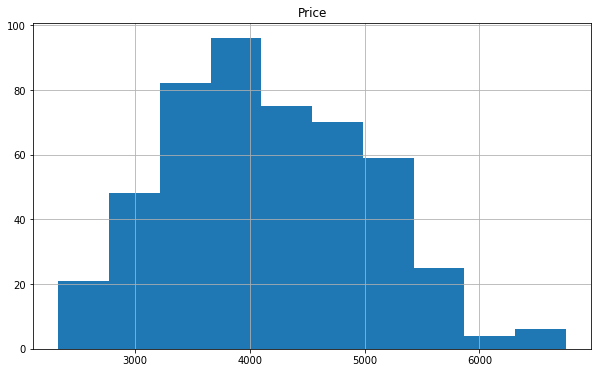

In [0]:
selData.hist()
py.show()

In [0]:
def stationaryPlot(timeSeries):
    movingAverage = timeSeries.rolling(52).mean()
    movingStd = timeSeries.rolling(52).std()
    py.plot(timeSeries, color='royalblue', label = 'Original')
    py.plot(movingAverage, color = 'red', label = 'RollingMean')
    py.plot(movingStd, color = 'lightgreen', label = 'RollingStd')
    py.legend(loc='best')
    py.show()

In [0]:
from statsmodels.tsa.stattools import adfuller
def adftest(timeSeries):
    adfresult = adfuller(timeSeries, autolag = "AIC")
    adfSummary = pd.Series(adfresult[0:4], index = ['TestStatistics', 'pValue', 'LagUsed', 
                                                    'Observations'])
    for key, val in adfresult[4].items():
        adfSummary['CriticalValue(%s)'%key] = val
    print('ADF Test Summary:')
    print(adfSummary)

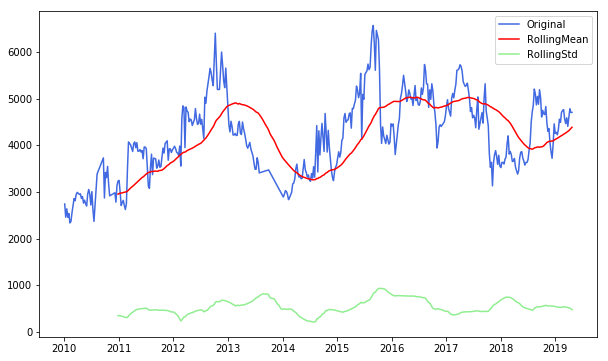

In [0]:
stationaryPlot(selData)

In [0]:
adftest(selData.Price)

ADF Test Summary:
TestStatistics         -3.354020
pValue                  0.012630
LagUsed                 1.000000
Observations          484.000000
CriticalValue(1%)      -3.443933
CriticalValue(5%)      -2.867530
CriticalValue(10%)     -2.569961
dtype: float64


In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(timeSeries):
    decomp = seasonal_decompose(timeSeries)
    trend = decomp.trend
    seasonal = decomp.seasonal
    residual = decomp.resid
    
    py.subplot(411)
    py.plot(timeSeries, label = 'Original')
    py.legend(loc = 'best')
    
    py.subplot(412)
    py.plot(trend, label = 'Trend')
    py.legend(loc = 'best')
    
    py.subplot(413)
    py.plot(seasonal, label = 'Seasonal')
    py.legend(loc = 'best')
    
    py.subplot(414)
    py.plot(residual, label = 'Residual')
    py.legend(loc = 'best')
    py.show()

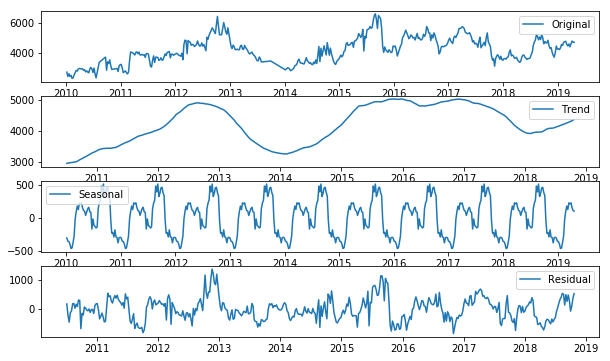

In [0]:
decompose(selData)

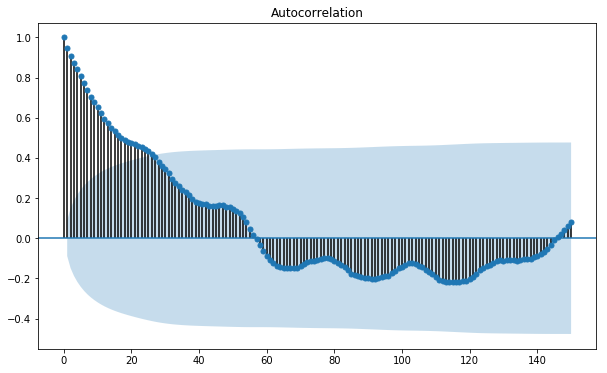

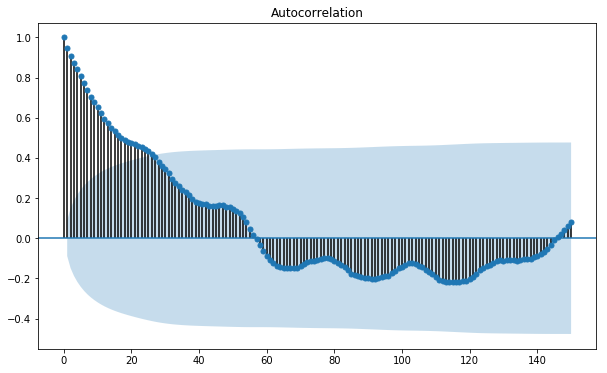

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(selData, lags=150)

In [0]:
#plot_acf(selData)

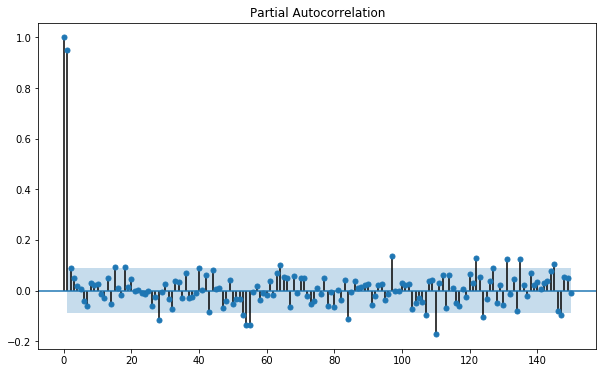

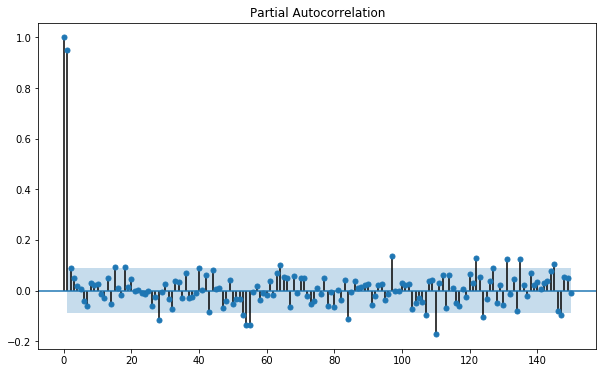

In [0]:
plot_pacf(selData, lags=150)

In [0]:
#plot_pacf(selData)

In [0]:
diffData = selData - selData.shift()
diffData.dropna(inplace = True)

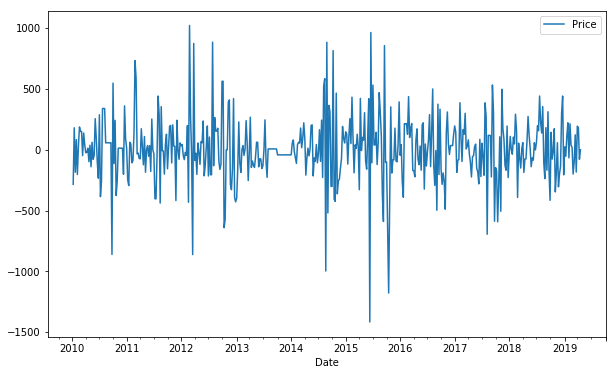

In [0]:
diffData.plot()
py.show()

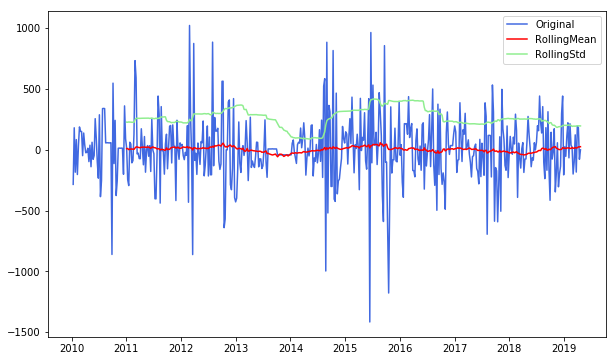

In [0]:
stationaryPlot(diffData)

In [0]:
adftest(diffData.Price)

ADF Test Summary:
TestStatistics       -1.763191e+01
pValue                3.794827e-30
LagUsed               1.000000e+00
Observations          4.830000e+02
CriticalValue(1%)    -3.443962e+00
CriticalValue(5%)    -2.867543e+00
CriticalValue(10%)   -2.569967e+00
dtype: float64


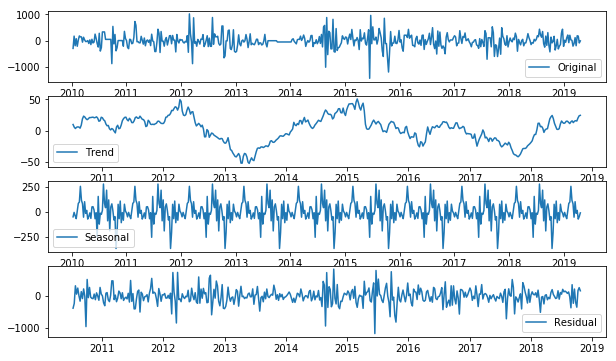

In [0]:
decompose(diffData)

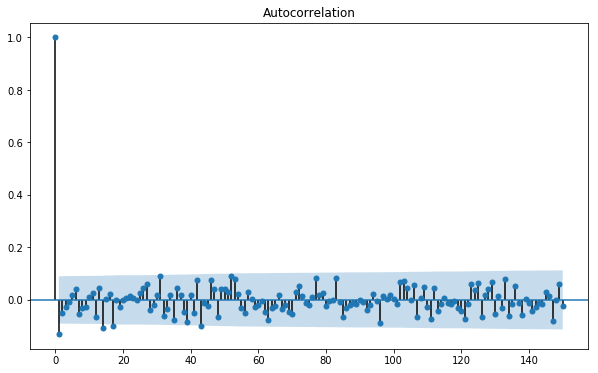

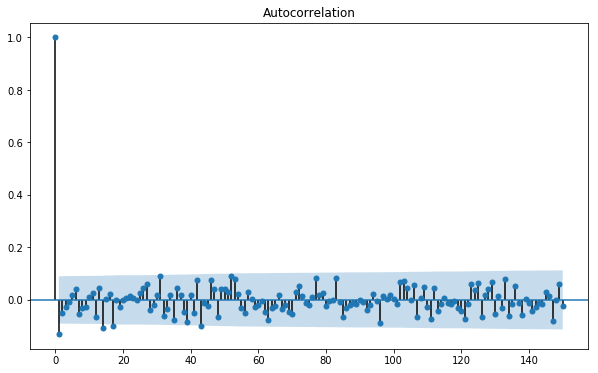

In [0]:
plot_acf(diffData, lags=150)

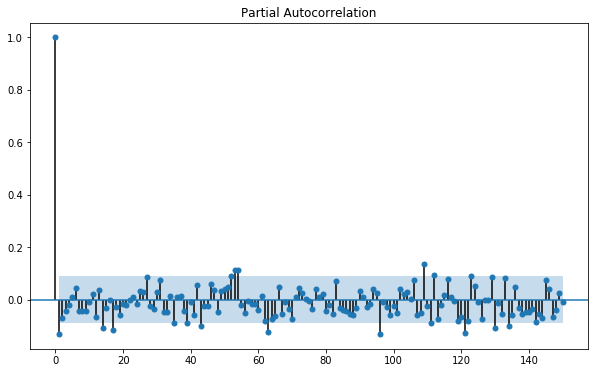

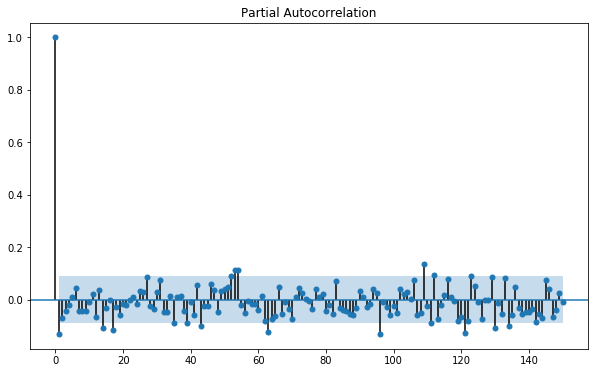

In [0]:
plot_pacf(diffData, lags=150)

In [0]:
dValue = 1

In [0]:
from statsmodels.tsa.stattools import acf
acfDiff = acf(diffData, nlags = 52)

In [0]:
if(acfDiff[52] >= 0):
  seasonalP = 1;
  seasonalQ = 0;
else:
  seasonalP = 0;
  seasonalQ = 1;
seasonalD = 1;

In [0]:
print(seasonalP)
print(seasonalQ)
print(seasonalD)

1
0
1


In [0]:
trainSize = round(selData.shape[0] * 0.85)
testSize = selData.shape[0] - trainSize
print(trainSize)
print(testSize)

413
73


In [0]:
trainData = selData[:trainSize]
testData = selData[-testSize:]

In [0]:
print(trainData.head())
print(trainData.tail())

             Price
Date              
2010-01-04  2742.0
2010-01-11  2458.0
2010-01-18  2639.0
2010-01-25  2455.0
2010-02-01  2539.0
             Price
Date              
2017-10-30  3637.0
2017-11-06  3132.0
2017-11-13  3629.0
2017-11-20  3801.0
2017-11-27  3888.0


In [0]:
print(testData.head())
print(testData.tail())

             Price
Date              
2017-12-04  3760.0
2017-12-11  3592.0
2017-12-18  3788.0
2017-12-25  3560.0
2018-01-01  3524.0
             Price
Date              
2019-03-25  4410.0
2019-04-01  4604.0
2019-04-08  4786.0
2019-04-15  4708.0
2019-04-22  4708.0


In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [0]:
aic = dict()
def SARIMA(timeSeries):
    i = 0
    j = 0

    for i in range(0,4):
        for j in range(0,4):
            model = SARIMAX(timeSeries, order=(i,dValue,j),
                            seasonal_order=(seasonalP,seasonalD,seasonalQ,52), 
                            enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit()
            aic[str(i)+str(j)] = results.aic

In [0]:
%%time

SARIMA(trainData)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarn

Wall time: 5min 27s


In [0]:
aic

{'00': 4477.385738779616,
 '01': 4455.596262562312,
 '02': 4452.2314366945575,
 '03': 4454.129058225346,
 '10': 4449.723651804004,
 '11': 4439.443758293749,
 '12': 4440.122758009669,
 '13': 4440.93995649061,
 '20': 4426.73734400417,
 '21': 4426.195627832897,
 '22': 4427.6307496533045,
 '23': 4423.452425691261,
 '30': 4412.74164150434,
 '31': 4414.604893579138,
 '32': 4416.216276662597,
 '33': 4418.8456739229005}

In [0]:
minValue = np.inf
minKey = None
for key, val in aic.items():
    if(val < minValue):
        minValue=val
        minKey = key
        
print(minKey)
print(minValue)

30
4412.74164150434


In [0]:
pValue, qValue = list(minKey)

In [0]:
#type(pValue)

In [0]:
pValue = int(pValue)

In [0]:
qValue = int(qValue)

In [0]:
print(pValue)
print(qValue)

3
0


In [0]:
#type(pValue)

In [0]:
%%time

model = SARIMAX(trainData, order = (pValue,dValue,qValue),
                seasonal_order=(seasonalP,seasonalD,seasonalQ,52),
               enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


Wall time: 9.72 s


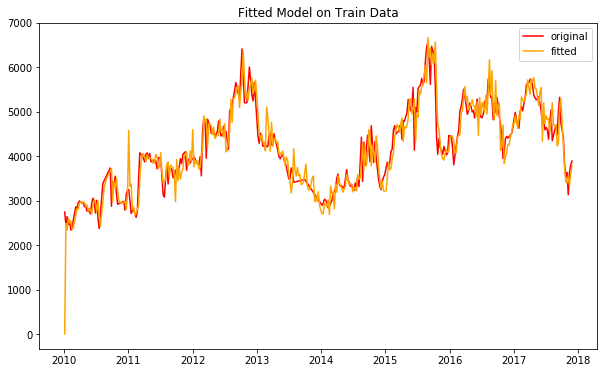

In [0]:
py.plot(trainData, color="red", label="original")
py.plot(results.fittedvalues,color="orange",label="fitted")
py.legend(loc="best")
py.title('Fitted Model on Train Data')
py.show()

In [0]:
def meap(fittedVal, originalVal) :
  return np.mean(abs(fittedVal - originalVal)/originalVal * 100)

In [0]:
print('Mean Absolute Percentage Error for Fitted Model : %f'%meap(results.fittedvalues, trainData.Price))

Mean Absolute Percentage Error for Fitted Model : 5.871631


In [0]:
#selData[selData.Price == 0]

In [0]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  413
Model:             SARIMAX(3, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -2201.371
Date:                            Wed, 26 Jun 2019   AIC                           4412.742
Time:                                    21:14:10   BIC                           4431.343
Sample:                                01-04-2010   HQIC                          4420.182
                                     - 11-27-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2814      0.041     -6.892      0.000      -0.361      -0.201
ar.L2         -0.2161      0.055     -3.913      0.000      -0.324      -0.108
ar.L3         -0.0915      0.055     -1.665      0.096      -0.199       0.016
ar.S.L52      -0.4903      0.047    -10.432      0.000      -0.582      -0.398
sigma2      1.088e+05   7198.018     15.116      0.000    9.47e+04    1.23e+05
===================================================================================
Ljung-Box (Q):                       27.34   Jarque-Bera (JB):                25.53
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.48
Prob(H) (two-sided):                  0.86   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
print(results.resid.describe())

count     413.000000
mean       -2.108002
std       344.563152
min     -1324.338503
25%      -162.565679
50%        12.857012
75%       176.536003
max      2742.000000
dtype: float64


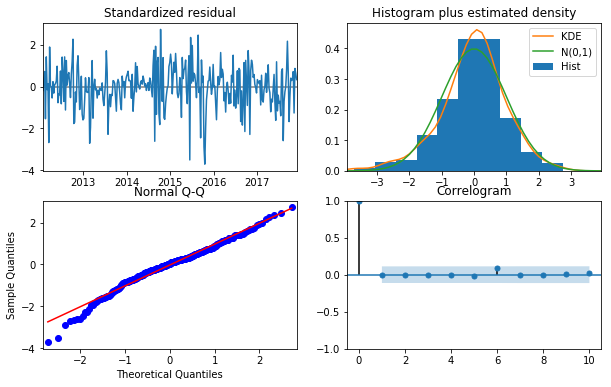

In [0]:
results.plot_diagnostics()
py.show()

In [0]:
forecast = results.forecast(steps=testSize)

In [0]:
forecast.head()

2017-12-04    3780.086615
2017-12-11    3750.771973
2017-12-18    3804.475636
2017-12-25    4065.681919
2018-01-01    4139.295366
Freq: W-MON, dtype: float64

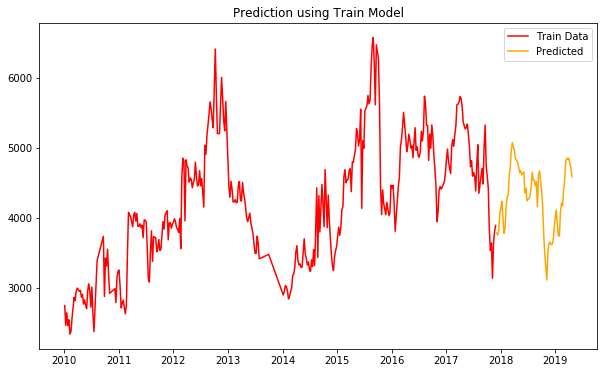

In [0]:
py.plot(trainData, label = "Train Data", color = "Red")
py.plot(forecast, label = "Predicted", color = "orange")
py.legend(loc = "best")
py.title('Prediction using Train Model')
py.show()

In [0]:
testCompare = results.get_prediction(start = (trainSize + 1),
                                    end = (selData.shape[0]), dynamic = False)
testPred = testCompare.conf_int()
testPred.head()

,lower Price,upper Price
2017-12-11,2954.648391,4546.895555
2017-12-18,2924.007402,4684.943870
2017-12-25,3106.261262,5025.102576
2018-01-01,3093.774957,5184.815776
2018-01-08,3109.417937,5357.554615


In [0]:
testPredMean =  testCompare.predicted_mean
testPredMean.head()

2017-12-11    3750.771973
2017-12-18    3804.475636
2017-12-25    4065.681919
2018-01-01    4139.295366
2018-01-08    4233.486276
Freq: W-MON, dtype: float64

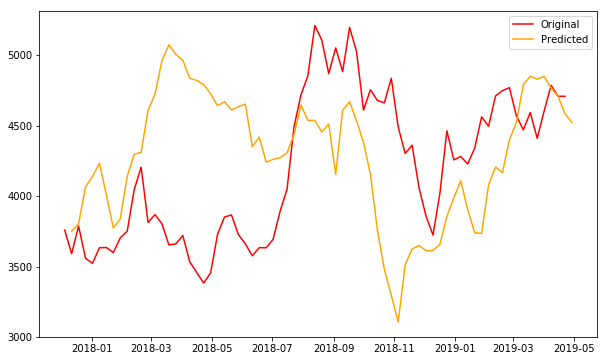

In [0]:
py.plot(testData, label = "Original", color = "Red")
py.plot(testPredMean, label = "Predicted", color = "orange")
py.legend(loc = "best")
py.show()

In [0]:
print('Mean Absolute Percentage Error for Test Prediction : %f' %meap(testPredMean, testData.Price))

Mean Absolute Percentage Error for Test Prediction : 14.506533


In [0]:
futurePrediction = results.get_prediction(start = (trainSize + 1),
                                    end = (selData.shape[0]+100), dynamic = False)
futurePred = futurePrediction.conf_int()
futurePred.head()

,lower Price,upper Price
2017-12-11,2954.648391,4546.895555
2017-12-18,2924.007402,4684.943870
2017-12-25,3106.261262,5025.102576
2018-01-01,3093.774957,5184.815776
2018-01-08,3109.417937,5357.554615


In [0]:
futurePredMean =  futurePrediction.predicted_mean
futurePredMean.head()

2017-12-11    3750.771973
2017-12-18    3804.475636
2017-12-25    4065.681919
2018-01-01    4139.295366
2018-01-08    4233.486276
Freq: W-MON, dtype: float64

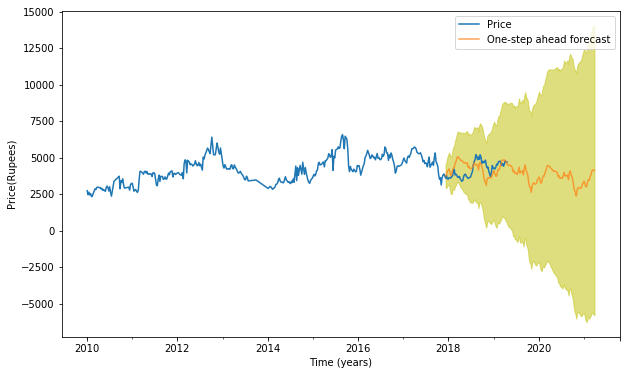

In [0]:
ax = selData.plot(label='observed')
futurePredMean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(futurePred.index,
                futurePred.iloc[:, 0],
                futurePred.iloc[:, 1], color='y', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Price(Rupees)')
py.legend()

py.show()